# Geochemistry. Session 1

We consider the setting of the French-German P0 problem seen with Didier Voisin (acid rains). A box model is used to compute the time evolution of the mass of a pollutent, e.g. $SO_2$. The equation is:
$$ \frac{dm}{dt} = S - k m $$
The differential equation is integrated numerically, after the time discretization of the mass:
$$ m_{n+1} = m_{n} + (E - k m_{n} ) \times dt $$
where $m$ is mass, $dt$ the time step, $E$ the emission, $k$ a coefficient for chemical and transport losses. $n$ is a time index.

Goal number 1 is to code the computation of the time evolution of the $SO_2$ mass in the simple setting of problem P0. 

Goal number 2 is to complexify this model by introducing time variations of the emission terms. Step by step, the model can be done more realistic.

## A few useful imports

In [1]:
import numpy as np                        # pour le calcul numérique
import matplotlib.pyplot as plt           # pour les plots, et dessous, pour que les plots apparaissent dans le notebook
%matplotlib inline

## Set necessary parameters and initial mass

Good practices are:

* to give explicit names to variables, so that it is easy to guess what it represents by reading it.
* comment the code to explain, describe, etc

For example, the $SO_2$ mass in T could be named ``mass_so2_in_T``. Here we think that ``mso2``is clear enough.

In [2]:
Emission = 200.*1000./365.                    # in T/day
kphc = 1./4.                                # physicochemical constant, in /day
ktra = 1e-5*86400.                          # transport-loss constant (V/d), in /day
mso2 = 0.                                   # initial mass of SO2 (in T)
### Time related data
dt = 0.1                                     # in day
Nstep = 180                                 # Number of time steps we will compute. Must be an integer.

## Time loop
We start a time loop to compute the time evolution of mass recursively. Before that, we create an array to store the mass values through time.

We introduce here another good practice:

* distinguish between arrays used to compute and arrays used to store results.

Below, ``mso2`` is the computation array (in fact, it is a real number), while ``mso2_series`` is the storage array.

In [3]:
mso2_series = np.empty(Nstep)  # empty array of Nstep values. We could have made an array of zeros with np.zeros, too.
ktot = ktra + kphc

for i in range(Nstep):
    mso2 = mso2 + (Emission - ktot * mso2)*dt
    mso2_series[i] = mso2

## Plotting the time evolution of mass
We create an array with time values to plot mass against time.

Text(0, 0.5, '$SO_2$ mass')

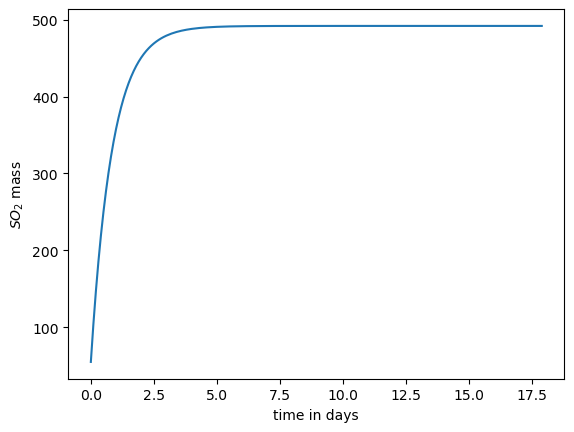

In [4]:
time_series = np.arange(Nstep)*dt
plt.plot(time_series, mso2_series)
plt.xlabel('time in days')
plt.ylabel('$SO_2$ mass')

## Seasonality of emissions
We introduce time variations of emissions. We consider for example daily variations (day/night) with a long-term decreasing due to governmental decisions (kidding...) in the form:
$$ E(t) = E_0 \left( 1.5 + \sin(\omega t) \right) e^{-t/\tau}$$
where $E_0$ is a constant parameter (amplitude), $\omega$ is a pulsation, and $\tau$ a time scale. $\omega = 2\pi/T$ where $T$=1 day and $\tau$=30 days.

### Method 1
 
Emissions can be computed before the time loop. In this case, the values are stored in an array, and the appropriate array entry is used in the time loop. The code would be this:

In [ ]:
time_series = np.arange(Nstep)*dt
omega = 2*np.pi/1
tau = 30

Emission_series = Emission * ( 1.5 + np.sin(omega*time_series) ) * np.exp(-time_series/tau)

mso2_series = np.empty(Nstep)  # empty array of Nstep values. We could have made an array of zeros with np.zeros, too.
mso2 = 0.

for i in range(Nstep):
    mso2 = mso2 + (Emission_series[i] - ktot * mso2)*dt
    mso2_series[i] = mso2

plt.plot(time_series, mso2_series)
plt.xlabel('time in days')
plt.ylabel('$SO_2$ mass')

### Method 2

Emissions can be computed within the time loop right before needing it. Note that the same method can be used to fill the ``timse_series`` array, what we do not do here.

In [ ]:
time_series = np.arange(Nstep)*dt
omega = 2*np.pi/1
tau = 30

mso2_series = np.empty(Nstep)  # empty array of Nstep values. We could have made an array of zeros with np.zeros, too.
mso2 = 0.

for i in range(Nstep):
    Emission_tmp = Emission * ( 1.5 + np.sin(omega*time_series[i]) )  * np.exp(-time_series[i]/tau)
    mso2 = mso2 + (Emission_tmp - ktot * mso2)*dt
    mso2_series[i] = mso2

plt.plot(time_series, mso2_series)
plt.xlabel('time in days')
plt.ylabel('$SO_2$ mass')

## Leap-frog scheme for time integration

Below we implement the Runge-Kutta 4 scheme in the case above.